In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler #从preprocessing库导入MinMaxScaler函数
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [47]:
#数据导入
dateparse=lambda dates: pd.datetime.strptime(dates,'%Y-%m')
data1=pd.read_excel('demo2.xlsx',parse_dates=['Month'],index_col='Month',date_parser=dateparse,sheet_name="1月")
data2=pd.read_excel('demo2.xlsx',parse_dates=['Month'],index_col='Month',date_parser=dateparse,sheet_name="2月")
data3=pd.read_excel('demo2.xlsx',parse_dates=['Month'],index_col='Month',date_parser=dateparse,sheet_name="3月")
data4=pd.read_excel('demo2.xlsx',parse_dates=['Month'],index_col='Month',date_parser=dateparse,sheet_name="4月")
data5=pd.read_excel('demo2.xlsx',parse_dates=['Month'],index_col='Month',date_parser=dateparse,sheet_name="5月")
data6=pd.read_excel('demo2.xlsx',parse_dates=['Month'],index_col='Month',date_parser=dateparse,sheet_name="6月")
data7=pd.read_excel('demo2.xlsx',parse_dates=['Month'],index_col='Month',date_parser=dateparse,sheet_name="7月")
data8=pd.read_excel('demo2.xlsx',parse_dates=['Month'],index_col='Month',date_parser=dateparse,sheet_name="8月")
data9=pd.read_excel('demo2.xlsx',parse_dates=['Month'],index_col='Month',date_parser=dateparse,sheet_name="9月")
data10=pd.read_excel('demo2.xlsx',parse_dates=['Month'],index_col='Month',date_parser=dateparse,sheet_name="10月")
data11=pd.read_excel('demo2.xlsx',parse_dates=['Month'],index_col='Month',date_parser=dateparse,sheet_name="11月")
data12=pd.read_excel('demo2.xlsx',parse_dates=['Month'],index_col='Month',date_parser=dateparse,sheet_name="12月")

C:\Users\zyaaa\AppData\Local\Temp/ipykernel_27244/3143494466.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse=lambda dates: pd.datetime.strptime(dates,'%Y-%m')


In [48]:
values = data1.values
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
data1_s = scaled
label1_s1 = data1_s[:, 0]
label1_s2 = data1_s[:, 1]
label1_s3 = data1_s[:, 2]
label1_s4 = data1_s[:, 3]
label1_s5 = data1_s[:, 4]
label1_s6 = data1_s[:, 5]

In [49]:
def generate_pair(x, y, ts):
    length = len(x)
    start, end = 0, length - ts
    data = []
    label = []
    for i in range(end):
        data.append(x[i: i+ts, :])
        label.append(y[i+ts])
    return np.array(data, dtype=np.float64), np.array(label, dtype=np.float64)

data1_g, label1_g1 = generate_pair(data1_s, label1_s1, ts=2)
data1_g, label1_g2 = generate_pair(data1_s, label1_s2, ts=2)
data1_g, label1_g3 = generate_pair(data1_s, label1_s3, ts=2)
data1_g, label1_g4 = generate_pair(data1_s, label1_s4, ts=2)
data1_g, label1_g5 = generate_pair(data1_s, label1_s5, ts=2)
data1_g, label1_g6 = generate_pair(data1_s, label1_s6, ts=2)

In [50]:
# 划分数据集
train_test_split = int(0.7 * len(label1_g1))
def hf(label):
    return label[0: train_test_split],label
train1_x = data1_g[0: train_test_split]
test1_x = data1_g
train1_y1, test1_y1 = hf(label1_g1)
train1_y2, test1_y2 = hf(label1_g2)
train1_y3, test1_y3 = hf(label1_g3)
train1_y4, test1_y4 = hf(label1_g4)
train1_y5, test1_y5 = hf(label1_g5)
train1_y6, test1_y6 = hf(label1_g6)

In [51]:
data1_s1 = data1_g[8, :, :]
data1_s2 = scaled[-2:,:]
f1 = []
f1.append(data1_s1)
f1.append(data1_s2)
f1 = np.array(f1)

Epoch 1/100
7/7 - 2s - loss: 0.6174 - val_loss: 0.4994 - 2s/epoch - 249ms/step
Epoch 2/100
7/7 - 0s - loss: 0.5239 - val_loss: 0.4703 - 51ms/epoch - 7ms/step
Epoch 3/100
7/7 - 0s - loss: 0.4440 - val_loss: 0.4623 - 53ms/epoch - 8ms/step
Epoch 4/100
7/7 - 0s - loss: 0.4416 - val_loss: 0.4431 - 51ms/epoch - 7ms/step
Epoch 5/100
7/7 - 0s - loss: 0.4015 - val_loss: 0.4117 - 56ms/epoch - 8ms/step
Epoch 6/100
7/7 - 0s - loss: 0.3726 - val_loss: 0.3804 - 69ms/epoch - 10ms/step
Epoch 7/100
7/7 - 0s - loss: 0.3023 - val_loss: 0.3142 - 54ms/epoch - 8ms/step
Epoch 8/100
7/7 - 0s - loss: 0.2782 - val_loss: 0.2917 - 53ms/epoch - 8ms/step
Epoch 9/100
7/7 - 0s - loss: 0.2543 - val_loss: 0.2633 - 49ms/epoch - 7ms/step
Epoch 10/100
7/7 - 0s - loss: 0.2229 - val_loss: 0.2507 - 51ms/epoch - 7ms/step
Epoch 11/100
7/7 - 0s - loss: 0.1953 - val_loss: 0.2302 - 55ms/epoch - 8ms/step
Epoch 12/100
7/7 - 0s - loss: 0.2150 - val_loss: 0.2230 - 55ms/epoch - 8ms/step
Epoch 13/100
7/7 - 0s - loss: 0.1945 - val_loss:

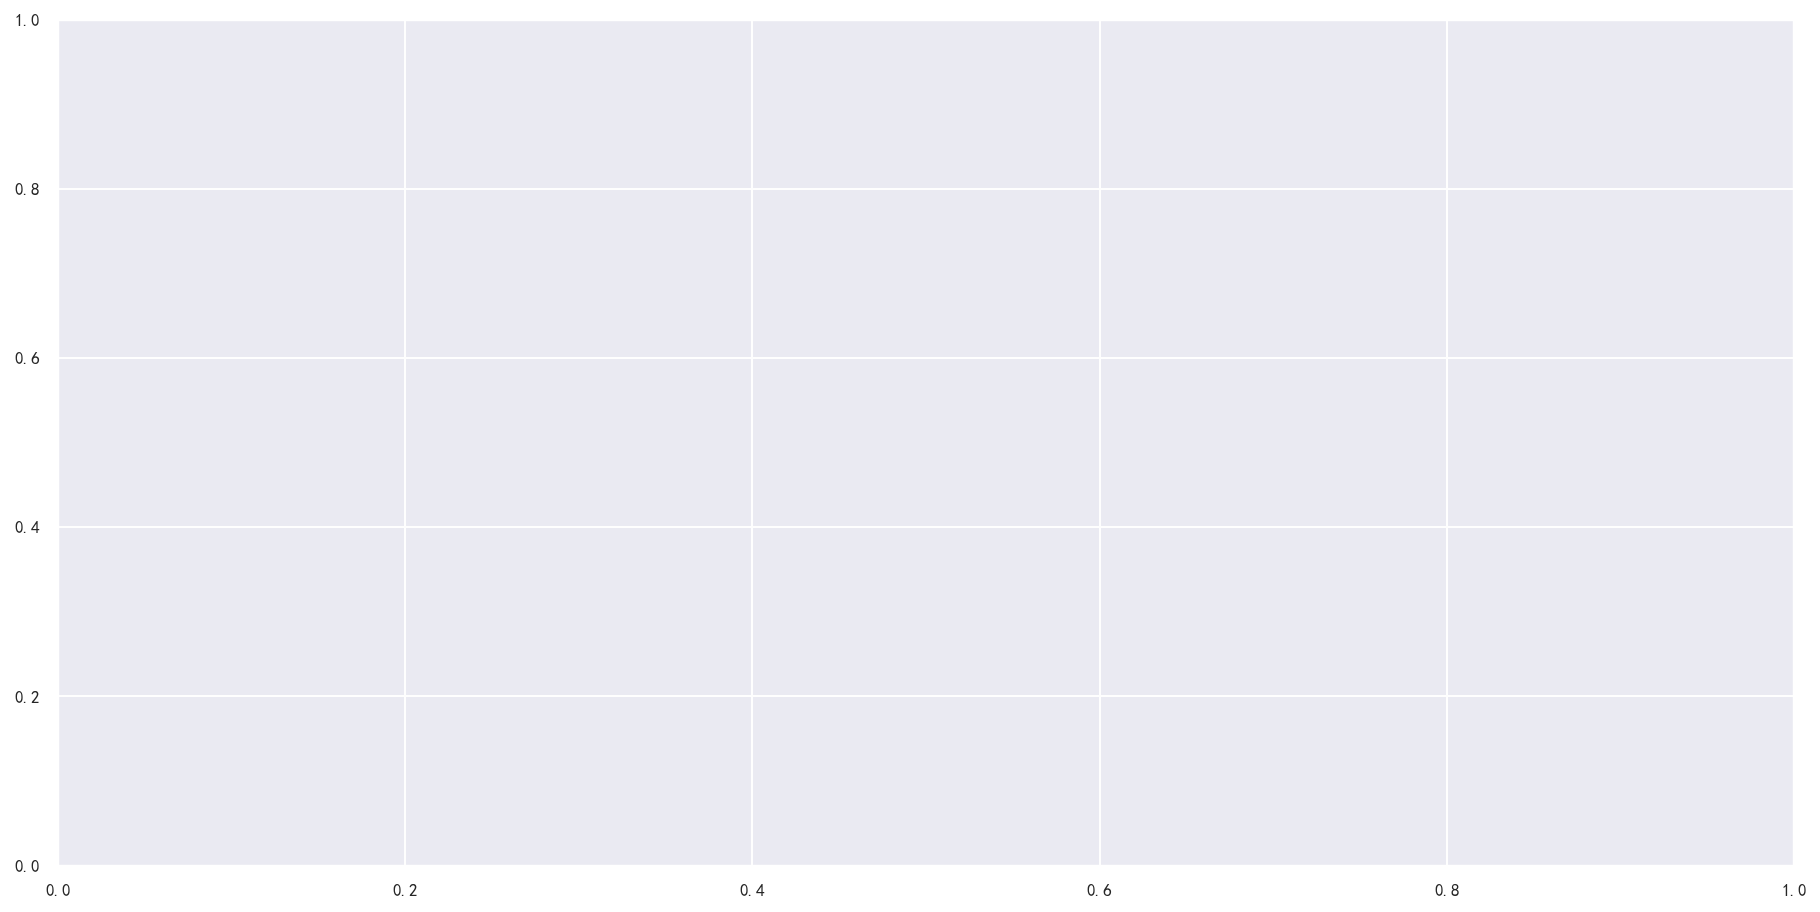

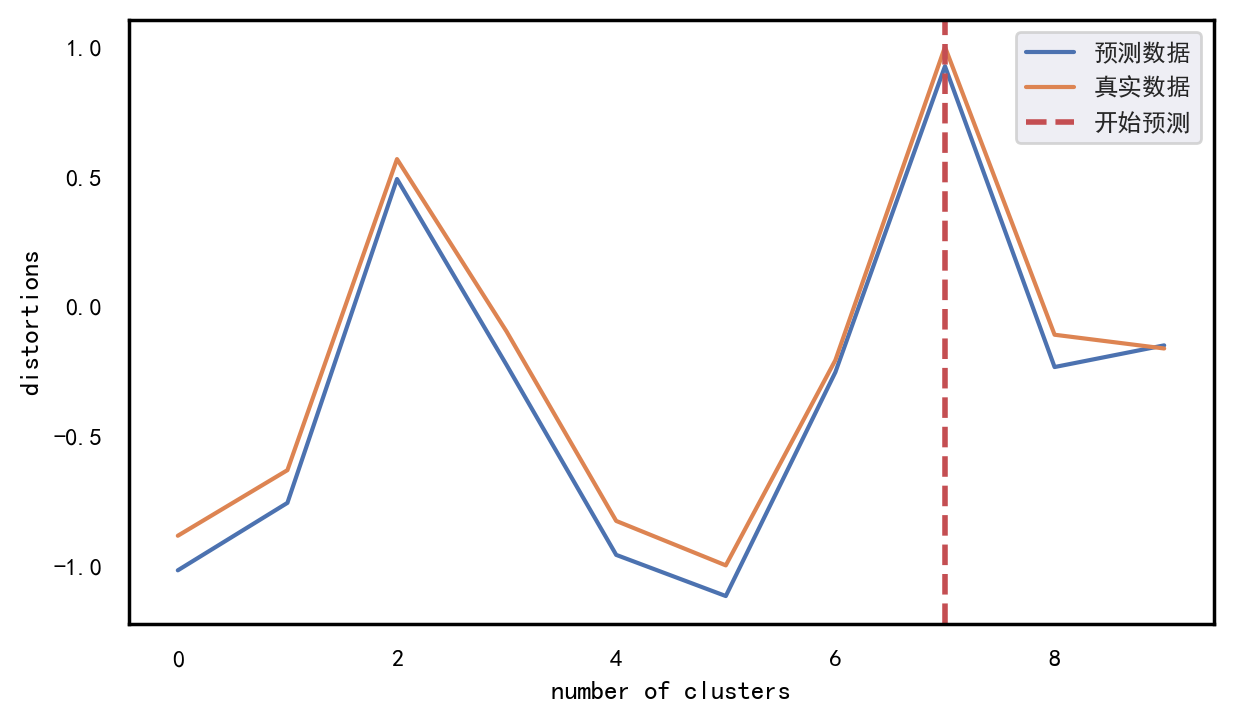

In [52]:
model = Sequential()
model.add(LSTM(256, input_shape=(train1_x.shape[1], train1_x.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决无法显示符号的问题
sns.set(font='SimHei', font_scale=0.8)        # 解决Seaborn中文显示问题
plt.subplots(figsize=(16,8),dpi=140,facecolor='w')# 设置画布大小，分辨率，和底色

history = model.fit(train1_x, train1_y1, epochs=100, batch_size=1, validation_data=(test1_x, test1_y1), verbose=2, shuffle=True)
yhat = model.predict(test1_x) 
#设置背景色
plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决无法显示符号的问题
sns.set(font='SimHei', font_scale=0.8)        # 解决Seaborn中文显示问题

fig = plt.figure(dpi=200,figsize=(7,4))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('white')
fig.patch.set_facecolor('white')
ax.spines['right'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')

plt.xlabel('number of clusters',color='black')
plt.ylabel('distortions',color='black')
#设置横纵坐标轴的颜色
plt.tick_params(axis='x',colors='black')
plt.tick_params(axis='y',colors='black')

plt.plot(yhat[train_test_split-7: train_test_split+3])
plt.plot(test1_y1[train_test_split-7: train_test_split+3])
plt.axvline(x=7, c="r", ls="--", lw=2)
plt.legend(['预测数据', '真实数据', '开始预测'])
plt.grid()
plt.show()

Epoch 1/100
7/7 - 2s - loss: 0.6392 - val_loss: 0.5161 - 2s/epoch - 233ms/step
Epoch 2/100
7/7 - 0s - loss: 0.5251 - val_loss: 0.4923 - 51ms/epoch - 7ms/step
Epoch 3/100
7/7 - 0s - loss: 0.5005 - val_loss: 0.4749 - 58ms/epoch - 8ms/step
Epoch 4/100
7/7 - 0s - loss: 0.4804 - val_loss: 0.4480 - 55ms/epoch - 8ms/step
Epoch 5/100
7/7 - 0s - loss: 0.4136 - val_loss: 0.4076 - 51ms/epoch - 7ms/step
Epoch 6/100
7/7 - 0s - loss: 0.3681 - val_loss: 0.3648 - 55ms/epoch - 8ms/step
Epoch 7/100
7/7 - 0s - loss: 0.3159 - val_loss: 0.3281 - 56ms/epoch - 8ms/step
Epoch 8/100
7/7 - 0s - loss: 0.2920 - val_loss: 0.3044 - 51ms/epoch - 7ms/step
Epoch 9/100
7/7 - 0s - loss: 0.2598 - val_loss: 0.2782 - 53ms/epoch - 8ms/step
Epoch 10/100
7/7 - 0s - loss: 0.2354 - val_loss: 0.2534 - 52ms/epoch - 7ms/step
Epoch 11/100
7/7 - 0s - loss: 0.2080 - val_loss: 0.2418 - 55ms/epoch - 8ms/step
Epoch 12/100
7/7 - 0s - loss: 0.2019 - val_loss: 0.2175 - 56ms/epoch - 8ms/step
Epoch 13/100
7/7 - 0s - loss: 0.1984 - val_loss: 

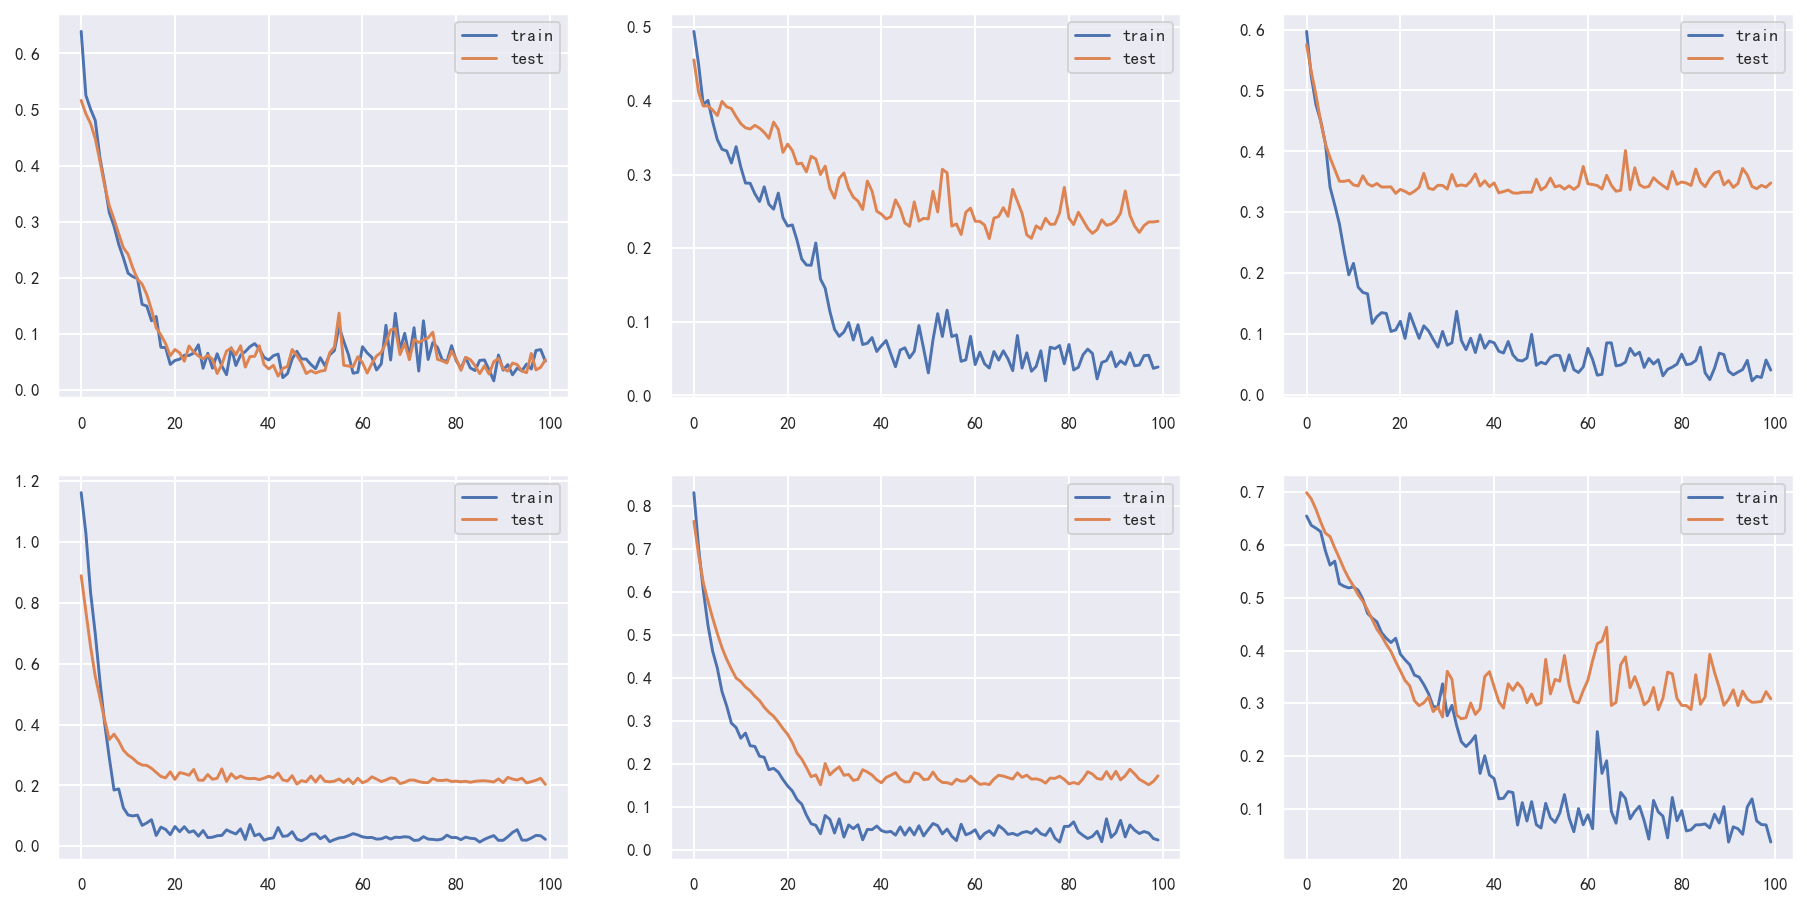

In [31]:
model = Sequential()
model.add(LSTM(256, input_shape=(train1_x.shape[1], train1_x.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决无法显示符号的问题
sns.set(font='SimHei', font_scale=0.8)        # 解决Seaborn中文显示问题
plt.subplots(figsize=(16,8),dpi=140,facecolor='w')# 设置画布大小，分辨率，和底色

history = model.fit(train1_x, train1_y1, epochs=100, batch_size=1, validation_data=(test1_x, test1_y1), verbose=2, shuffle=True)
f1_1 = float(model.predict(f1)[[1]])
plt.subplot(231)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

history = model.fit(train1_x, train1_y2, epochs=100, batch_size=1, validation_data=(test1_x, test1_y2), verbose=2, shuffle=True)
f1_2 = float(model.predict(f1)[[1]])
plt.subplot(232)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

history = model.fit(train1_x, train1_y3, epochs=100, batch_size=1, validation_data=(test1_x, test1_y3), verbose=2, shuffle=True)
f1_3 = float(model.predict(f1)[[1]])
plt.subplot(233)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

history = model.fit(train1_x, train1_y4, epochs=100, batch_size=1, validation_data=(test1_x, test1_y4), verbose=2, shuffle=True)
f1_4 = float(model.predict(f1)[[1]])
plt.subplot(234)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

history = model.fit(train1_x, train1_y5, epochs=100, batch_size=1, validation_data=(test1_x, test1_y5), verbose=2, shuffle=True)
f1_5 = float(model.predict(f1)[[1]])
plt.subplot(235)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

history = model.fit(train1_x, train1_y6, epochs=100, batch_size=1, validation_data=(test1_x, test1_y6), verbose=2, shuffle=True)
f1_6 = float(model.predict(f1)[[1]])
plt.subplot(236)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [8]:
yc1 = scaled[1:11,:]
yc1 = np.row_stack((yc1,[f1_1, f1_2, f1_3, f1_4, f1_5, f1_6]))
yc1 = scaler.inverse_transform(yc1)
yc2 = pd.DataFrame(yc1[10,0:4]).T
yc2.columns=['10cm湿度(kg/m2)','40cm湿度(kg/m2)', '100cm湿度(kg/m2)', '200cm湿度(kg/m2)']

In [9]:
yc = pd.DataFrame(columns=(['10cm湿度(kg/m2)','40cm湿度(kg/m2)', '100cm湿度(kg/m2)', '200cm湿度(kg/m2)']))
yc = yc.append(yc2)

In [10]:
yc

,10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2),200cm湿度(kg/m2)
0,12.320142,30.724883,59.091917,166.869932
